In [1]:
import pandas as pd

In [18]:
df=pd.read_csv('/content/swiggy.csv')

In [19]:
df

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
...,...,...,...,...,...,...,...,...,...,...
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28


In [20]:
df.set_index('ID', inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8680 entries, 211 to 466488
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           8680 non-null   object 
 1   City           8680 non-null   object 
 2   Restaurant     8680 non-null   object 
 3   Price          8680 non-null   float64
 4   Avg ratings    8680 non-null   float64
 5   Total ratings  8680 non-null   int64  
 6   Food type      8680 non-null   object 
 7   Address        8680 non-null   object 
 8   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 678.1+ KB


In [22]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Handle missing or malformed entries
df['Food type'] = df['Food type'].fillna('')

# Step 2: Split string into list (safe way)
df['Food type list'] = df['Food type'].apply(lambda x: [i.strip() for i in str(x).split(',') if i.strip()])

# Step 3: Encode with MultiLabelBinarizer
mlb = MultiLabelBinarizer()
food_type_encoded = mlb.fit_transform(df['Food type list'])

# Step 4: Create binary DataFrame
food_type_df = pd.DataFrame(food_type_encoded, columns=mlb.classes_)

# Step 5: Align indexes
df = df.reset_index(drop=True)
food_type_df = food_type_df.reset_index(drop=True)

# Step 6: Concatenate and drop original columns
df = pd.concat([df, food_type_df], axis=1)
df.drop(['Food type', 'Food type list'], axis=1, inplace=True)


In [23]:
df

,Area,City,Restaurant,Price,Avg ratings,Total ratings,Address,Delivery time,Afghani,African,...,Thai,Thalis,Tibetan,Tibetan Chinese Asian Snacks Continental Desserts Beverages,Tribal,Turkish,Use code XPRESS121 to avail.,Vietnamese,Waffle,indian
0,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,5Th Block,59,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,5Th Block,56,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Double Road,50,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,80 Feet Road,57,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Indiranagar,Bangalore,Nh8,350.0,4.0,50,80 Feet Road,63,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Navrangpura,40,0,0,...,0,0,0,0,0,0,0,0,0,0
8676,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,Rohini,28,0,0,...,0,0,0,0,0,0,0,0,0,0
8677,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,Rohini,58,0,0,...,0,0,0,0,0,0,0,0,0,0
8678,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,Rohini,28,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Columns: 608 entries, Area to indian
dtypes: float64(2), int64(602), object(4)
memory usage: 40.3+ MB


In [27]:
df.drop('Address', axis=1, inplace=True)

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Area', 'City', 'Restaurant']:
    df[col] = le.fit_transform(df[col].astype(str))


In [29]:
df.isnull().sum()

,0
Area,0
City,0
Restaurant,0
Price,0
Avg ratings,0
...,...
Turkish,0
Use code XPRESS121 to avail.,0
Vietnamese,0
Waffle,0


In [30]:
df[df.duplicated()]

,Area,City,Restaurant,Price,Avg ratings,Total ratings,Delivery time,Afghani,African,American,...,Thai,Thalis,Tibetan,Tibetan Chinese Asian Snacks Continental Desserts Beverages,Tribal,Turkish,Use code XPRESS121 to avail.,Vietnamese,Waffle,indian
375,31,7,4932,250.0,4.3,100,73,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8079,367,0,1239,100.0,2.9,80,80,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


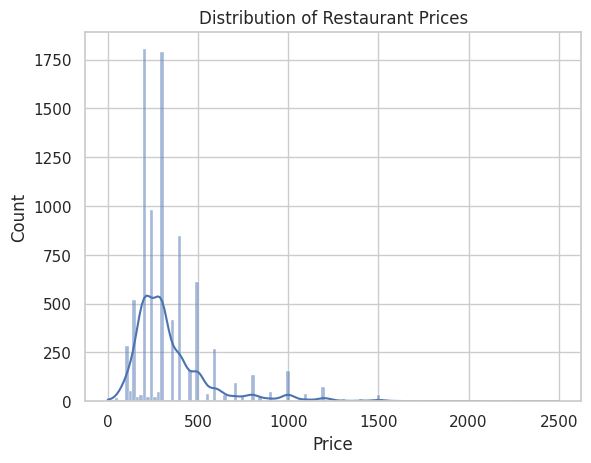

In [32]:
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of Restaurant Prices")
plt.show()
#  Distribution of Restaurant Prices

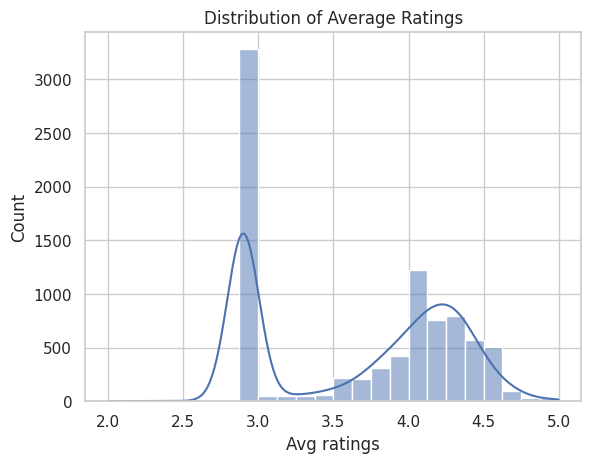

In [33]:
sns.histplot(df['Avg ratings'], kde=True)
plt.title("Distribution of Average Ratings")
plt.show()
# Distribution of Average Ratings

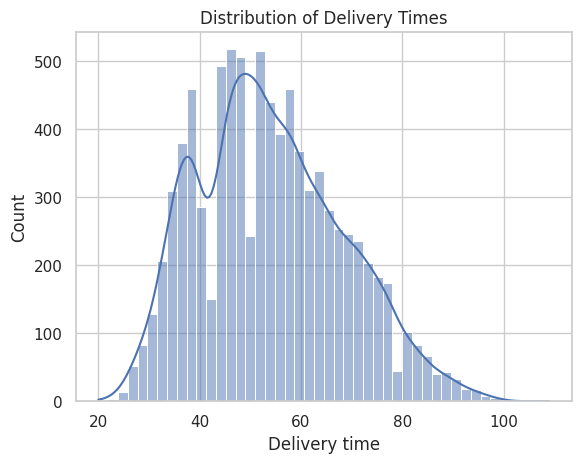

In [34]:
sns.histplot(df['Delivery time'], kde=True)
plt.title("Distribution of Delivery Times")
plt.show()
# Distribution of Delivery Times

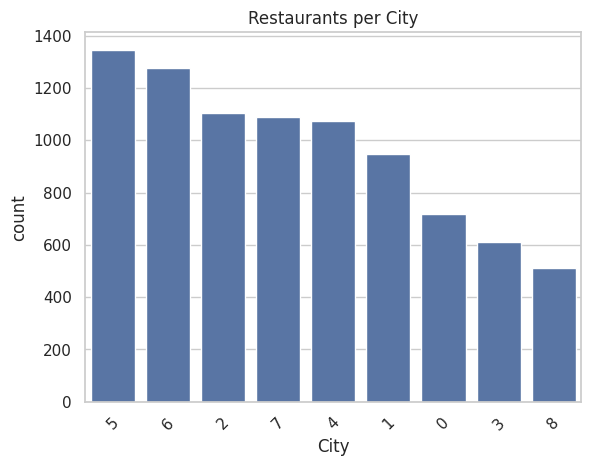

In [35]:
sns.countplot(data=df, x='City', order=df['City'].value_counts().index)
plt.title("Restaurants per City")
plt.xticks(rotation=45)
plt.show()
# Number of Restaurants per City

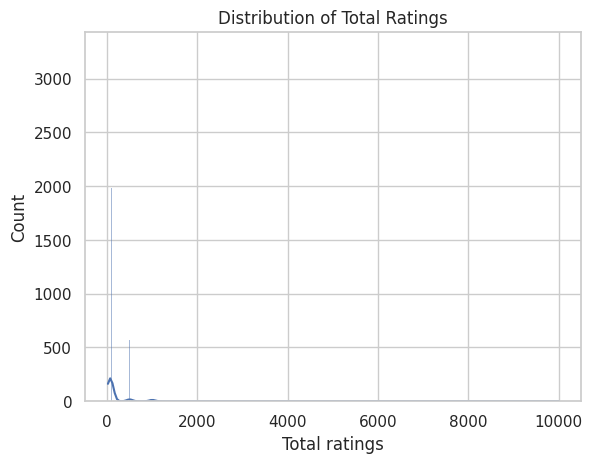

In [36]:
sns.histplot(df['Total ratings'], kde=True)
plt.title("Distribution of Total Ratings")
plt.show()
# Distribution of Total Ratings

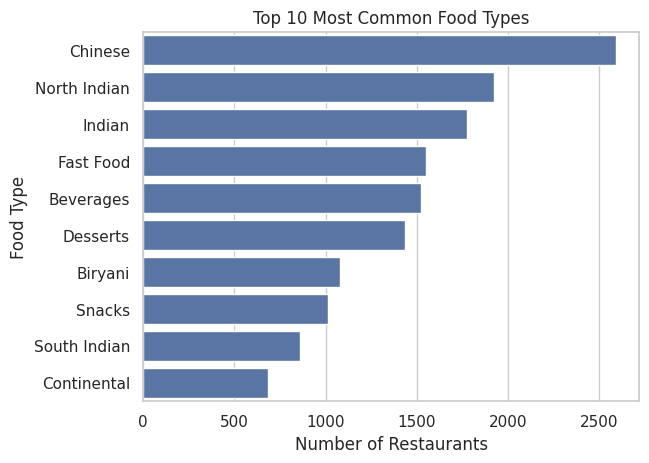

In [37]:
# Get the list of encoded food type columns
food_type_columns = mlb.classes_

# Sum each column to get frequency
top_foods = df[food_type_columns].sum().sort_values(ascending=False).head(10)


sns.barplot(x=top_foods.values, y=top_foods.index)
plt.title("Top 10 Most Common Food Types")
plt.xlabel("Number of Restaurants")
plt.ylabel("Food Type")
plt.show()


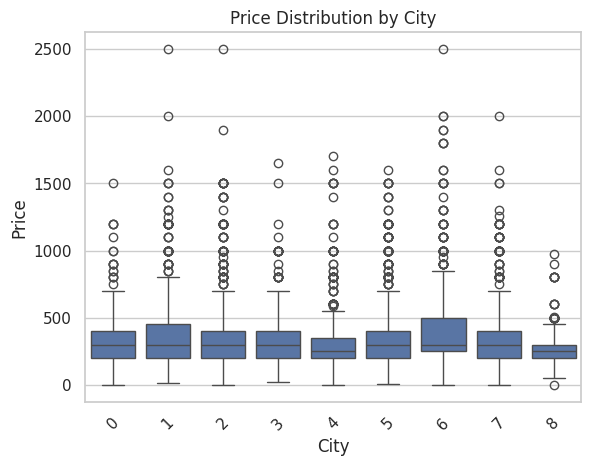

In [38]:
sns.boxplot(data=df, x='City', y='Price')
plt.title("Price Distribution by City")
plt.xticks(rotation=45)
plt.show()
# Price Distribution by City

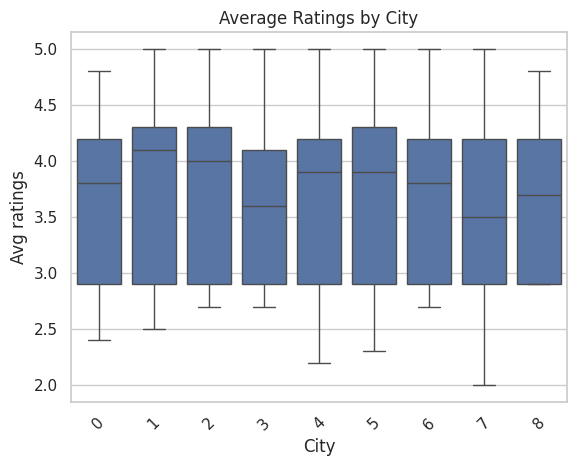

In [39]:
sns.boxplot(data=df, x='City', y='Avg ratings')
plt.title("Average Ratings by City")
plt.xticks(rotation=45)
plt.show()
# Average Ratings by City

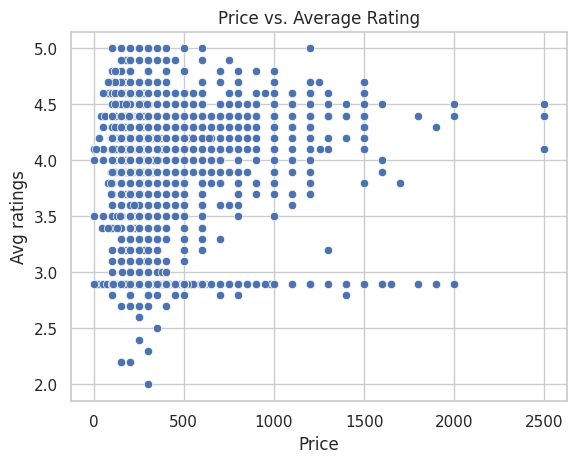

In [40]:
sns.scatterplot(data=df, x='Price', y='Avg ratings')
plt.title("Price vs. Average Rating")
plt.show()
# Price vs. Average Rating

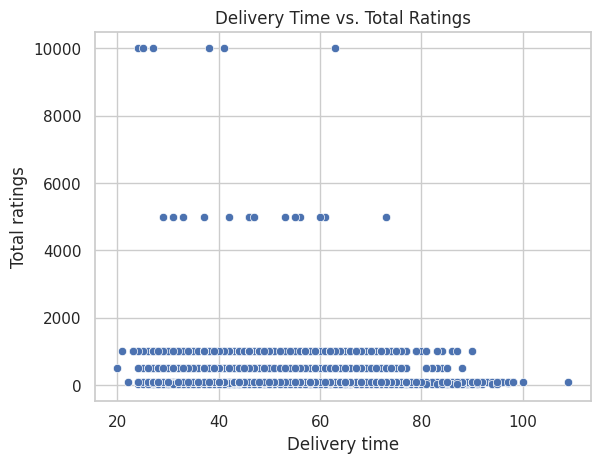

In [41]:
sns.scatterplot(data=df, x='Delivery time', y='Total ratings')
plt.title("Delivery Time vs. Total Ratings")
plt.show()
# Delivery Time vs. Total Ratings

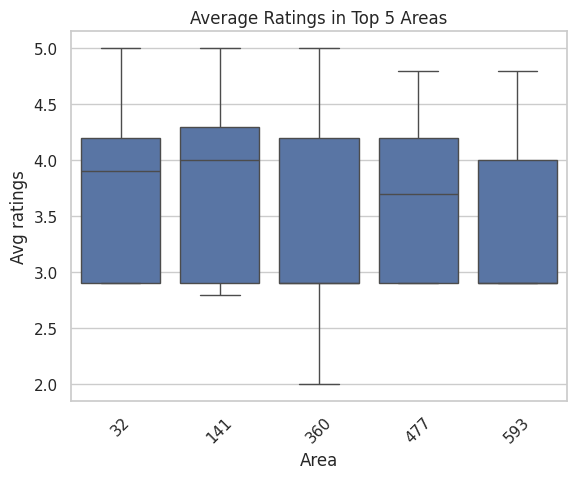

In [43]:
top_areas = df['Area'].value_counts().nlargest(5).index
sns.boxplot(data=df[df['Area'].isin(top_areas)], x='Area', y='Avg ratings')
plt.title("Average Ratings in Top 5 Areas")
plt.xticks(rotation=45)
plt.show()
# Average Ratings in Top 5 Areas

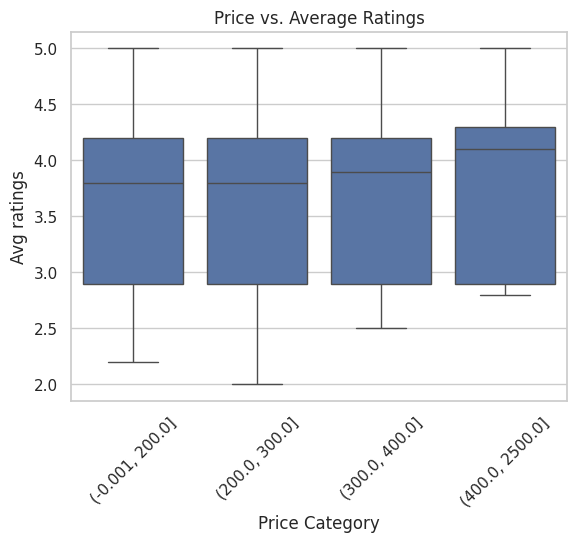

In [44]:
df['Price Category'] = pd.qcut(df['Price'], 4)
sns.boxplot(data=df, x='Price Category', y='Avg ratings')
plt.title("Price vs. Average Ratings")
plt.xticks(rotation=45)
plt.show()
# Do Expensive Restaurants Get Better Ratings

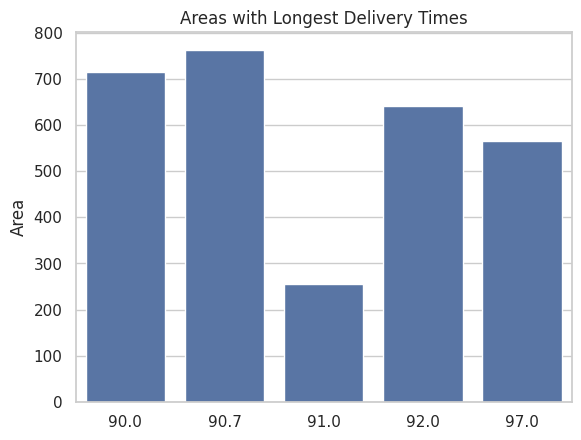

In [45]:
top_delivery_areas = df.groupby('Area')['Delivery time'].mean().nlargest(5)
sns.barplot(x=top_delivery_areas.values, y=top_delivery_areas.index)
plt.title("Areas with Longest Delivery Times")
plt.show()
# Areas with Longest Delivery Times

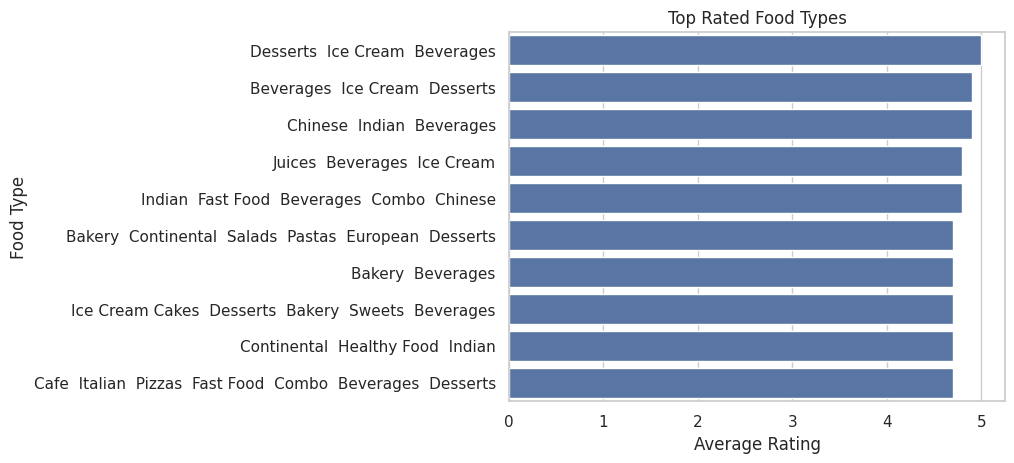

In [46]:
food_ratings = {}

# Loop through each food type column
for food in mlb.classes_:
    # Select ratings where this food type is present
    ratings = df.loc[df[food] == 1, 'Avg ratings']
    # Compute average rating for that food type
    food_ratings[food] = ratings.mean()

# Convert to DataFrame and get top 10
top_rated_foods = pd.Series(food_ratings).sort_values(ascending=False).head(10)

sns.barplot(x=top_rated_foods.values, y=top_rated_foods.index)
plt.title("Top Rated Food Types")
plt.xlabel("Average Rating")
plt.ylabel("Food Type")
plt.show()
# Top Rated Food Types

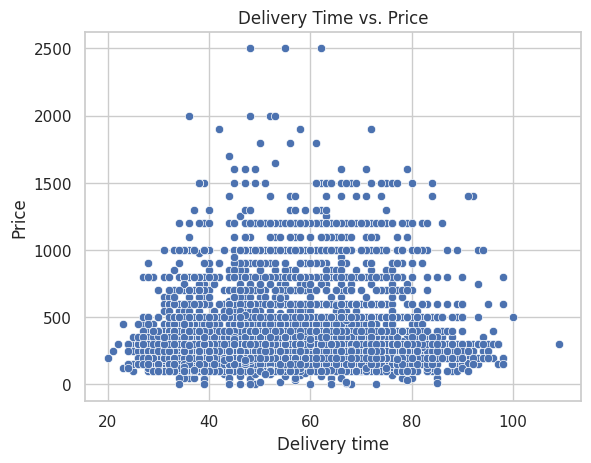

In [47]:
sns.scatterplot(data=df, x='Delivery time', y='Price')
plt.title("Delivery Time vs. Price")
plt.show()
